In [1]:
import numpy as np
import pandas as pd

In [2]:
OUT_SIZE = 20
num_classes = 1
garb_path = "../garbage/garbage-images/"
background_path = "../garbage/background/"
TARGET_PATH = "../garbage/garbage_dataset/"

In [3]:
import cv2
import matplotlib.pyplot as plt

In [4]:
import json5
import os
import pickle

In [5]:
with open("export_26.json","r") as f:
    data = json5.load(f)

In [6]:
garbimg = os.listdir(garb_path)

In [8]:
movedf = os.listdir(TARGET_PATH)

# Try -0.1

In [9]:
lbls = {}
not_found = {}
for dt in data:
    mask = np.zeros((dt['height'],dt['width'],1), dtype=np.uint8) # -0.1
    vector = np.asarray(dt['vector'])
    mask = cv2.fillPoly(mask, [vector], 1)
    rm = cv2.resize(mask, (OUT_SIZE,OUT_SIZE), interpolation = cv2.INTER_NEAREST)
    rm = rm.reshape(OUT_SIZE, OUT_SIZE, 1)
    if dt['imagename'] not in garbimg:
        if dt['imagename'] not in movedf:
            not_found[dt['imagename']] = dt
    if dt['imagename'] in lbls.keys():
        lbls[dt['imagename']] = np.clip(lbls[dt['imagename']] + rm, 0, 1)
    else:
        lbls[dt['imagename']] = rm

In [10]:
list(not_found.keys())

[]

In [11]:
len(lbls)

740

In [12]:
movedf = os.listdir(TARGET_PATH)

In [13]:
for f in movedf:
    if f not in lbls.keys():
        os.rename(TARGET_PATH+f, TARGET_PATH+'../leftovers/'+f)

In [14]:
backgrounds = os.listdir(background_path)

In [15]:
import random

In [16]:
# rand_backgrounds = random.sample(backgrounds, 800)
rand_backgrounds = backgrounds

In [17]:
rm = np.zeros((OUT_SIZE,OUT_SIZE,num_classes), dtype=np.uint8)# -0.1
for rb in rand_backgrounds:
    lbls[rb] = rm

In [18]:
len(lbls)

2062

In [19]:
for imn in lbls:
    try:
        os.rename(garb_path+imn, TARGET_PATH+imn)
    except FileNotFoundError:
        try:
            os.rename(background_path+imn, TARGET_PATH+imn)
        except FileNotFoundError:
            pass

In [20]:
with open("labels.pickle", "wb") as f:
    pickle.dump(lbls, f)

In [21]:
movedf = os.listdir(TARGET_PATH)

In [22]:
movedf.remove('train')
movedf.remove('test')

In [23]:
len(movedf)

2062

In [24]:
for i in range(5):
    random.shuffle(movedf)

In [29]:
ntrain = round(len(movedf)*0.85)
ntrain, len(movedf)-ntrain

(1753, 309)

In [30]:
train_nms = movedf[:ntrain]
test_nms = movedf[ntrain:]

In [31]:
for imn in test_nms:
    os.rename(TARGET_PATH+imn, TARGET_PATH+'test/'+imn)

In [32]:
for imn in train_nms:
    os.rename(TARGET_PATH+imn, TARGET_PATH+'train/'+imn)

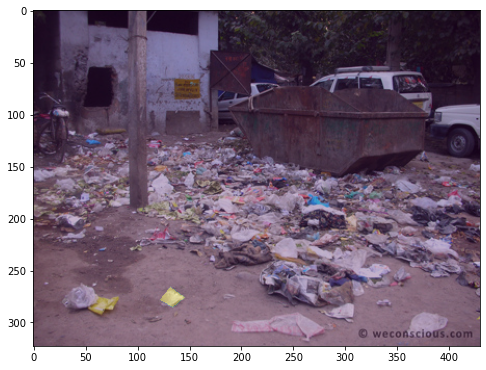

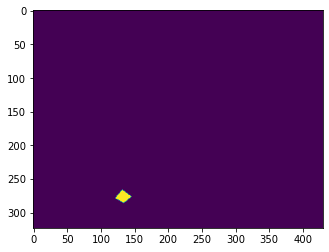

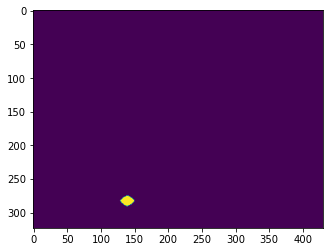

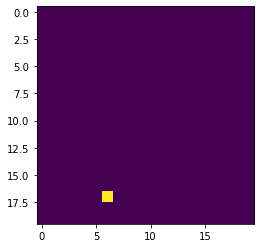

In [74]:
dt = data[13]
img = cv2.imread(TARGET_PATH+dt['imagename'])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
mask = np.zeros((dt['height'],dt['width'],num_classes), dtype=np.uint8)
vector = np.asarray(dt['vector'])
mask = cv2.fillPoly(mask, [vector], 1)
rm = cv2.resize(mask, (20,20), interpolation = cv2.INTER_NEAREST)
plt.figure(figsize=(8, 8), frameon=False)
plt.imshow(img)
plt.imshow(mask.squeeze(), alpha=0.3)
plt.show()
plt.imshow(mask.squeeze())
plt.show()
plt.imshow(cv2.resize(rm, mask.shape[1::-1]))
plt.show()
plt.imshow(rm)
plt.show()